<a href="https://colab.research.google.com/github/Denis04-M/news_group_topics/blob/main/news_groups_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['00' '000' '0d' '0t' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17'
 '18' '19' '1993' '1d9' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '34u' '35' '40' '45' '50' '55' '80' '92' '93'
 '__' '___' 'a86' 'able' 'ac' 'access' 'actually' 'address' 'ago' 'agree'
 'al' 'american' 'andrew' 'answer' 'anybody' 'apple' 'application' 'apr'
 'april' 'area' 'argument' 'armenian' 'armenians' 'article' 'ask' 'asked'
 'att' 'au' 'available' 'away' 'ax' 'b8f' 'bad' 'based' 'believe'
 'berkeley' 'best' 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board'
 'body' 'book' 'box' 'buy' 'ca' 'california' 'called' 'came' 'canada'
 'car' 'card' 'care' 'case' 'cause' 'cc' 'center' 'certain' 'certainly'
 'change' 'check' 'children' 'chip' 'christ' 'christian' 'christians'
 'church' 'city' 'claim' 'clinton' 'clipper' 'cmu' 'code' 'college'
 'color' 'colorado' 'columbia' 'com' 'come' 'comes' 'company' 'computer'
 'consider' 'contact' 'control' 'copy' 'correct' 'cost' 'country' 'co

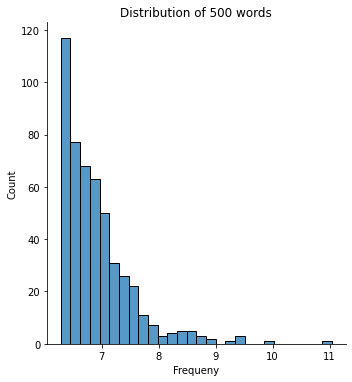

In [41]:
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names

topics = fetch_20newsgroups()
cv = CountVectorizer(stop_words = 'english', max_features= 500)
transformed = cv.fit_transform(topics.data)
print(cv.get_feature_names_out())

# plotting the distribution of words
sns.displot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.xlabel('Frequeny')
plt.title('Distribution of 500 words')
plt.show()

In [44]:
# data processing

# import nltk
# nltk.download('wordnet')

def letters_only(astr):
  return astr.isalpha()

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()
cleaned = []

for topic in topics.data:
  cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
  for word in topic.split()
  if letters_only(word) #calling function to remove number and special char
  and word not in all_names])) # removing names

transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'arab' 'area' 'argument'
 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack' 'attempt'
 'available' 'away' 'bad' 'based' 'basic' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'business' 'buy' 'ca' 'california' 'called' 'came' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clipper' 'code' 'college' 'color' 'come' 'coming'
 'command' 'comment' 'common' 'communication' 'company' 'computer'
 'computing' 'consider' 'considered' 'contact' 'control' 'controller'
 'copy' 'correct' 'cost' 'country' 'couple' 'course' 'cover' 'create'
 'crime' 'current' 'cut' 'data' 'day' 'db' 'deal' 'death' 'department'
 'design' 'device

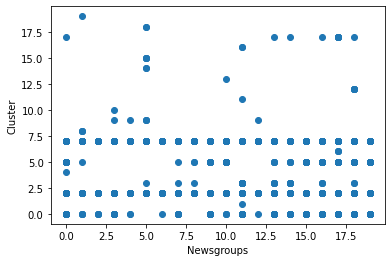

In [38]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 20)
km.fit(transformed)
labels = topics.target

plt.scatter(labels, km.labels_)
plt.xlabel("Newsgroups")
plt.ylabel('Cluster')
plt.show()

In [45]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 100, random_state=43).fit(transformed)
for topic_idx, topic in enumerate(nmf.components_):
  label = f'{topic_idx} :'
  print(label, " ".join([cv.get_feature_names_out()[i]
                         for i in topic.argsort() [:-9:-1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


0 : wa thought later took left order seen taken
1 : db bit data place stuff add time line
2 : server using display screen support code mouse application
3 : file section information write source change entry number
4 : disk drive hard controller support card board head
5 : entry rule program source number info email build
6 : new york sale change service result study early
7 : image software user package using display include support
8 : window manager application using offer user information course
9 : gun united control house american second national issue
10 : hockey league team game division player list san
11 : turkish government sent war study came american world
12 : program change technology display information version application rate
13 : space nasa technology service national international small communication
14 : government political federal sure free private local country
15 : output line open write read return build section
16 : people country doing tell live killed lot s